# Advanced Data Science Capstone Project - Leukemia Image Classification - Initial Data Exploration

BY Sayaka Minegishi
June 2021


## Use Case

This project will utilize the Leukemia Dataset uploaded to Kaggle by Nikhil Sharma to make an image classification program that classifies whether a patient has acute lymphoblastic leukemia, given an image of their bone marrow aspirate smear.

First, we will install the relevant packages

In [2]:
pip install opencv-python-headless

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 38.2 MB 18.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 26.1 MB 15.8 MB/s eta 0:00:01    |█████████████████████████████▌  | 24.0 MB 15.8 MB/s eta 0:00:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.0
    Uninstalling scipy-1.5.0:
      Successfully uninstalled scipy-1.5.0
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --user --upgrade tensorflow

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 454.3 MB 19 kB/s s eta 0:00:011�███▏                        | 101.4 MB 93.3 MB/s eta 0:00:04     |███████████████████             | 269.2 MB 81.6 MB/s eta 0:00:03:00:02██████████████████████▋       | 348.8 MB 80.5 MB/s eta 0:00:02
     |████████████████████████████████| 14.8 MB 71.4 MB/s eta 0:00:01
     |████████████████████████████████| 129 kB 74.4 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 81.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 71.9 MB/s eta 0:00:01
  

In [5]:
pip install keras==2.3.1

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 377 kB 16.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install tensorflow

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


#### Load Data

We will now download the bone marrow aspirate smear images using IBM Cloud's object storage. The images are all contained in a single folder called 'input' (imported as input.zip), and training and validation sets have already been created for both leukemia-positive and leukemia-negative individuals. 20% of the data for each category has been used for validation. 

In [15]:
import shutil
import os

#delete the directories containing our image files if they are already present
if 'input' in os.listdir("./"):
    shutil.rmtree('input')

if 'input.zip' in os.listdir("./"):
    os.remove('input.zip')

In [16]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-62a11686-a522-45e1-9d33-be942e569d01',
    'IBM_API_KEY_ID': 'AyDmNB01z7kaQWR4dCKsn7kmKj5OQ1dQRsDhMpSid0zy',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'coursera-donotdelete-pr-axcazqc6bchxob',
    'FILE': 'input.zip'
}


In [17]:
from ibm_botocore.client import Config
import ibm_boto3

cos1 = ibm_boto3.client(service_name = 's3', 
                       ibm_api_key_id = credentials_1['IBM_API_KEY_ID'],
                       ibm_service_instance_id = credentials_1['IAM_SERVICE_ID'],
                       ibm_auth_endpoint = credentials_1['IBM_AUTH_ENDPOINT'],
                       config = Config(signature_version='oauth'),
                       endpoint_url = credentials_1['ENDPOINT'])

In [18]:
#download the zip file containing all files

cos1.download_file(Bucket = credentials_1['BUCKET'], Key = 'input.zip', Filename = 'input.zip')

In [19]:
#extract the contents of the ALL positive zip file
from zipfile import*
print('Extract all files in input.zip to the current directory')
with ZipFile('input.zip', 'r') as zipObj:
    zipObj.extractall() #extract the contents of the zip file

Extract all files in input.zip to the current directory


In [23]:

if '__MACOSX' in os.listdir("./"):
    shutil.rmtree("./__MACOSX")

In [24]:
#check the directory
os.listdir("./")

['input.zip', 'input', '.virtual_documents']

## Initial Data Exploration


First we will check what files are in our directory.

In [20]:
#check the leukemia-positive individuals in the training data set
os.listdir("./input/training/positive") #check that the files are in the directory

['Im107_1.jpg',
 'Im067_1.jpg',
 'Im033_1.jpg',
 'Im050_1.jpg',
 'Im118_1.jpg',
 'Im041_1.jpg',
 'Im116_1.jpg',
 'Im082_1.jpg',
 'Im071_1.jpg',
 'Im121_1.jpg',
 'Im103_1.jpg',
 'Im092_1.jpg',
 'Im111_1.jpg',
 'Im046_1.jpg',
 'Im054_1.jpg',
 'Im094_1.jpg',
 'Im122_1.jpg',
 'Im042_1.jpg',
 'Im068_1.jpg',
 'Im120_1.jpg',
 'Im030_1.jpg',
 'Im093_1.jpg',
 'Im057_1.jpg',
 'Im036_1.jpg',
 'Im126_1.jpg',
 'Im080_1.jpg',
 'Im079_1.jpg',
 'Im031_1.jpg',
 'Im101_1.jpg',
 'Im104_1.jpg',
 'Im069_1.jpg',
 'Im049_1.jpg',
 'Im128_1.jpg',
 'Im086_1.jpg',
 'Im035_1.jpg',
 'Im060_1.jpg',
 'Im084_1.jpg',
 'Im047_1.jpg',
 'Im081_1.jpg',
 'Im052_1.jpg',
 'Im115_1.jpg',
 'Im100_1.jpg',
 'Im223_1.jpg',
 'Im125_1.jpg',
 'Im055_1.jpg',
 'Im058_1.jpg',
 'Im105_1.jpg',
 'Im077_1.jpg',
 'Im062_1.jpg',
 'Im073_1.jpg',
 'Im072_1.jpg',
 'Im124_1.jpg',
 'Im119_1.jpg',
 'Im117_1.jpg',
 'Im045_1.jpg',
 'Im043_1.jpg',
 'Im224_1.jpg',
 'Im029_1.jpg',
 'Im034_1.jpg',
 'Im078_1.jpg',
 'Im090_1.jpg',
 'Im085_1.jpg',
 'Im088_

In [22]:
#list of leukemia-negative individuals in the training set
print("Leukemia-negative individuals in training data set:")
print(os.listdir("./input/training/negative"))
print()

#list of leukemia-positive individuals in the validation set
print("list of leukemia-positive individuals in the validation set:")
print(os.listdir("./input/validation/positive"))
print()

#list of leukemia-negative individuals in the validation set
print("list of leukemia-negative individuals in the validation set:")
print(os.listdir("./input/validation/negative"))
print()

Leukemia-negative individuals in training data set:
['Im158_0.jpg', 'Im244_0.jpg', 'Im210_0.jpg', 'Im106_0.jpg', 'Im103_0.jpg', 'Im091_0.jpg', 'Im213_0.jpg', 'Im196_0.jpg', 'Im088_0.jpg', 'Im239_0.jpg', 'Im230_0.jpg', 'Im173_0.jpg', 'Im219_0.jpg', 'Im248_0.jpg', 'Im154_0.jpg', 'Im181_0.jpg', 'Im105_0.jpg', 'Im187_0.jpg', 'Im206_0.jpg', 'Im177_0.jpg', 'Im224_0.jpg', 'Im252_0.jpg', 'Im142_0.jpg', 'Im245_0.jpg', 'Im259_0.jpg', 'Im233_0.jpg', 'Im200_0.jpg', 'Im203_0.jpg', 'Im184_0.jpg', 'Im156_0.jpg', 'Im090_0.jpg', 'Im139_0.jpg', 'Im094_0.jpg', 'Im162_0.jpg', 'Im227_0.jpg', 'Im185_0.jpg', 'Im165_0.jpg', 'Im096_0.jpg', 'Im195_0.jpg', 'Im095_0.jpg', 'Im146_0.jpg', 'Im254_0.jpg', 'Im148_0.jpg', 'Im222_0.jpg', 'Im180_0.jpg', 'Im102_0.jpg', 'Im166_0.jpg', 'Im131_0.jpg', 'Im143_0.jpg', 'Im186_0.jpg', 'Im249_0.jpg', 'Im214_0.jpg', 'Im229_0.jpg', 'Im172_0.jpg', 'Im223_0.jpg', 'Im215_0.jpg', 'Im171_0.jpg', 'Im237_0.jpg', 'Im220_0.jpg', 'Im212_0.jpg', 'Im159_0.jpg', 'Im216_0.jpg', 'Im236_0.jpg', 'I

We notice that there is a non-image file called '.DS_Store' in the subdirectory containing leukemia-positive individuals in the training data set. We will need to get rid of this in the ETL stage.

In [26]:
#Check the number of observations in our data
print("The number of leukemia-positive images in our training set is: ", len(os.listdir("./input/training/positive")))
print("The number of leukemia-negative images in our training set is: ", len(os.listdir("./input/training/negative")))
print()
print("The number of leukemia-positive images in our validation set is: ", len(os.listdir("./input/validation/positive")))
print("The number of leukemia-negative images in our validation set is: ", len(os.listdir("./input/validation/negative")))



The number of leukemia-positive images in our training set is:  107
The number of leukemia-negative images in our training set is:  152

The number of leukemia-positive images in our validation set is:  27
The number of leukemia-negative images in our validation set is:  38


We will now check that the image files open properly:

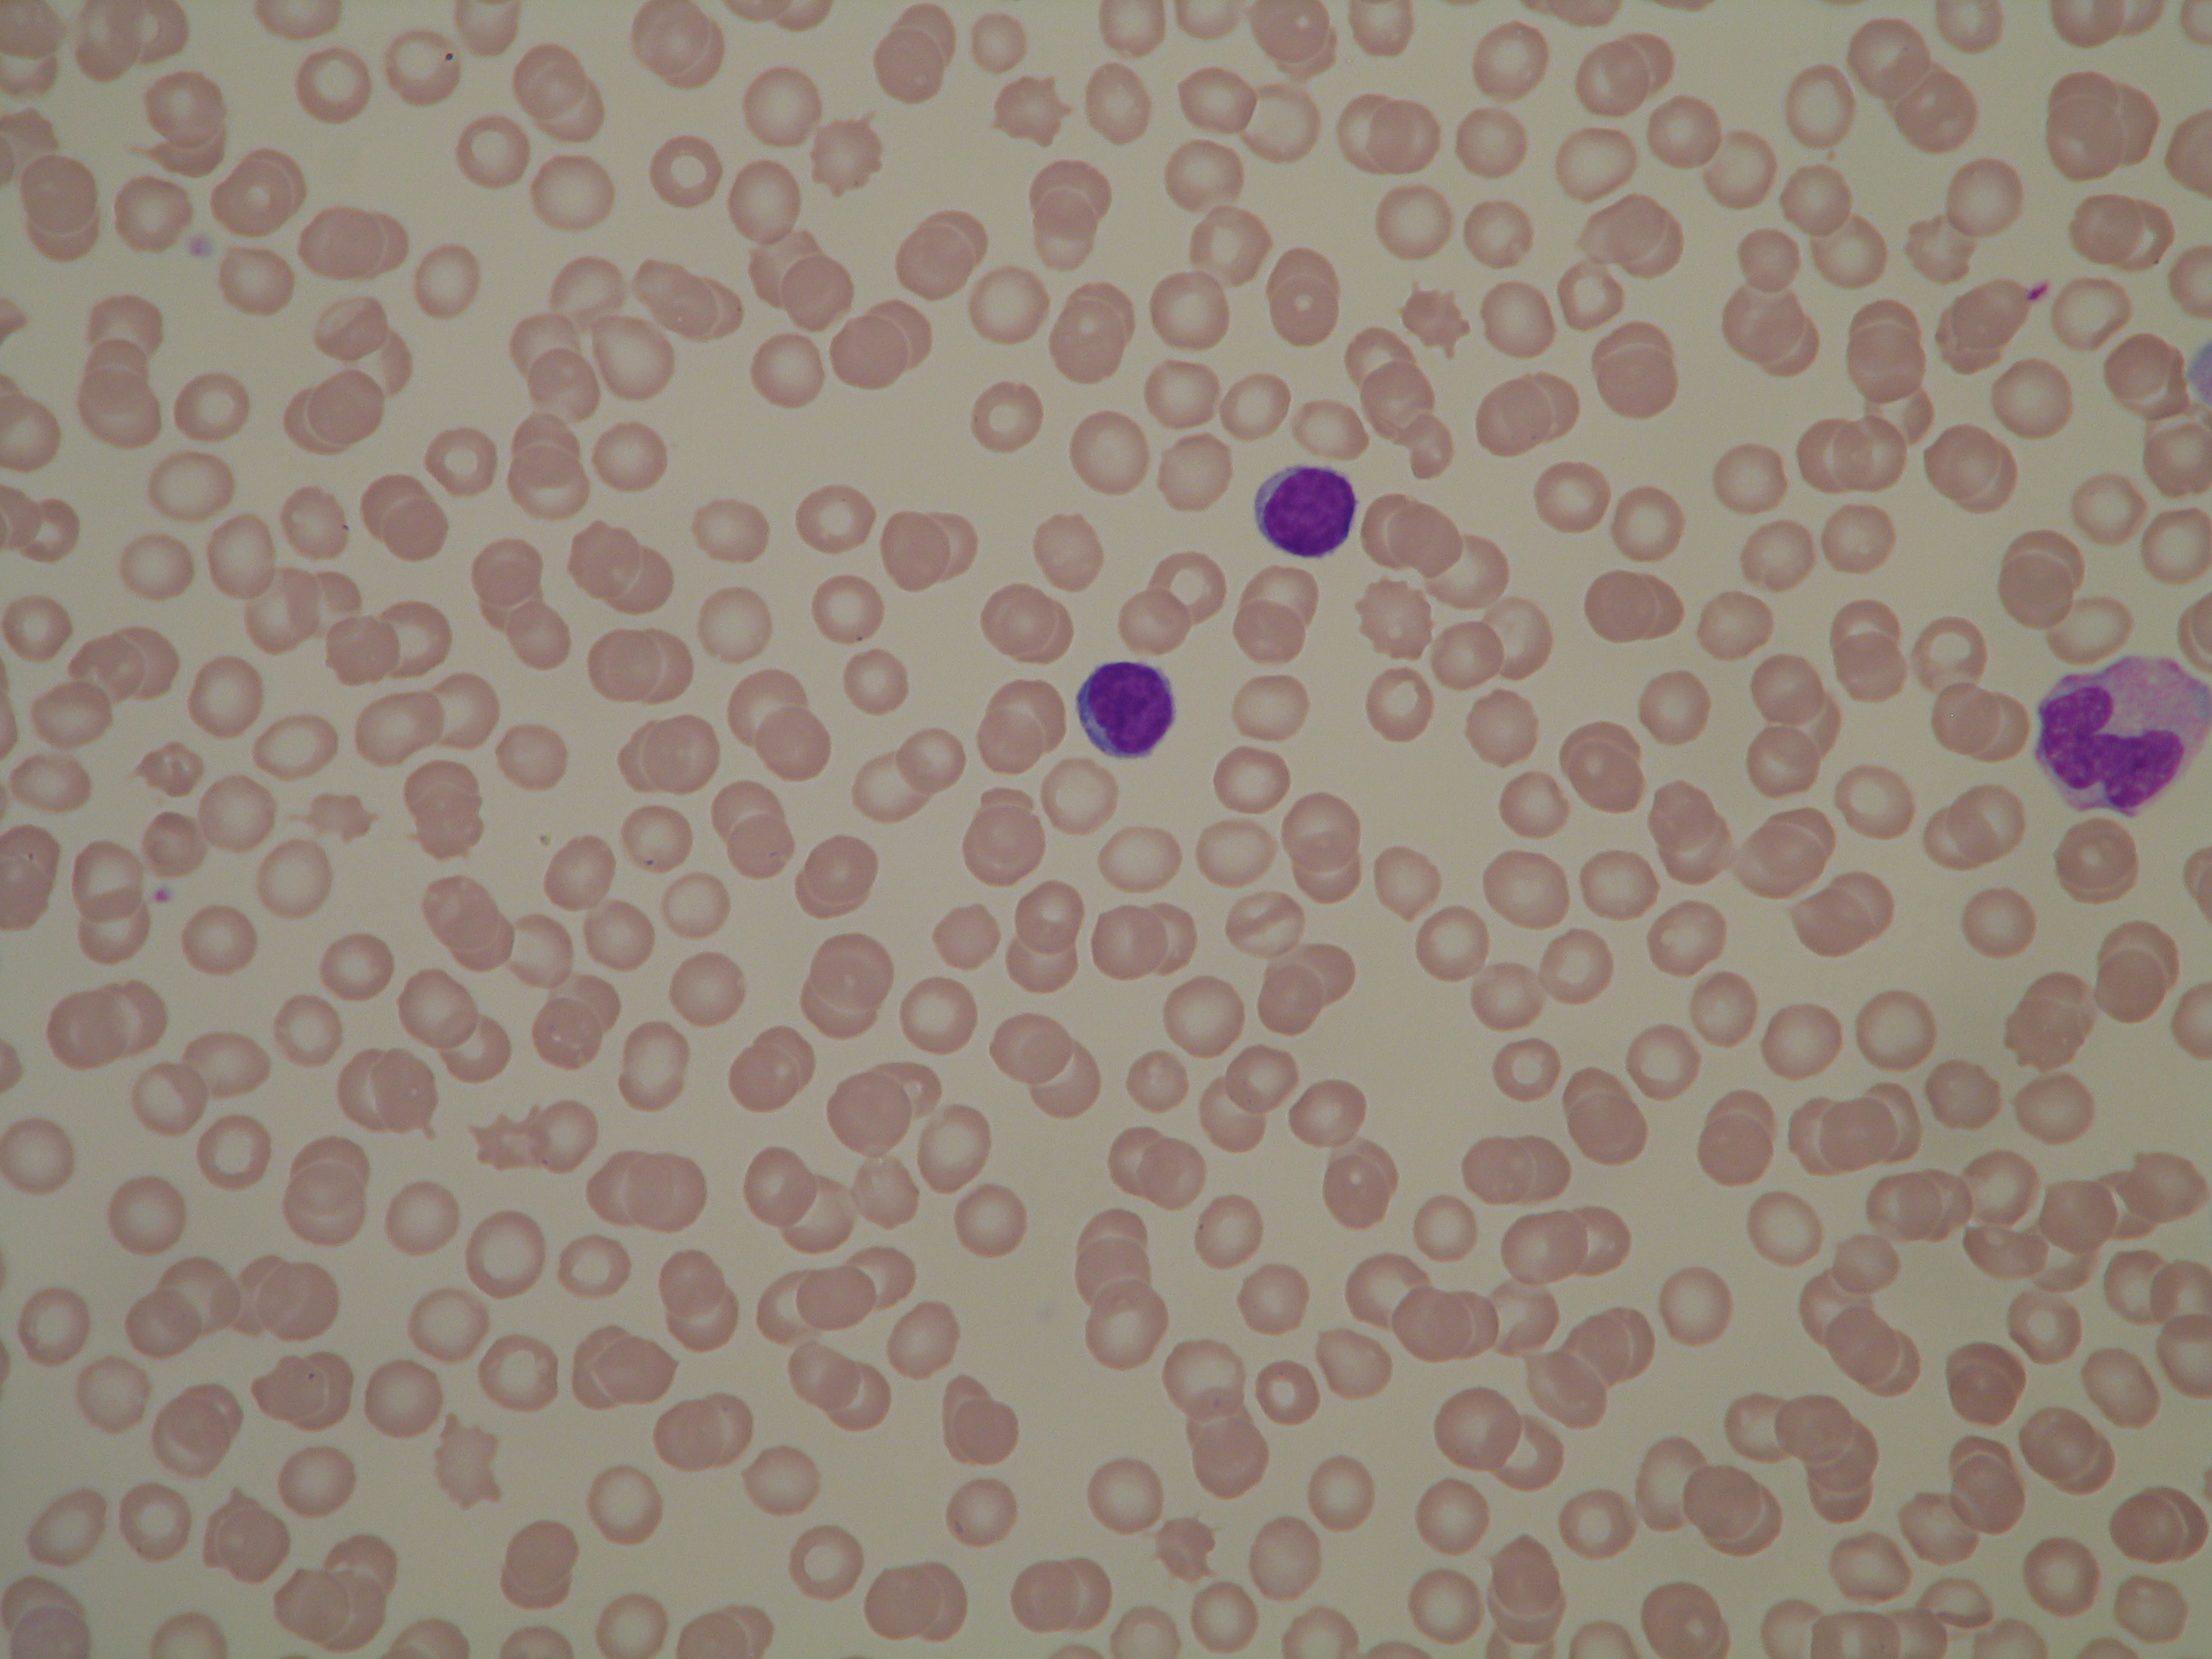

In [38]:
#examine a leukemia negative image at random from the training set
import PIL
from PIL import Image

ALL_negative_list = [] #make a list to store the image paths for leukemia-negative individuals

#append the file path to the array
for file in os.listdir("./input/training/negative"):
    file = "./input/training/negative/" + file
    ALL_negative_list.append(file)

#examine one of the images from leukemia negative individuals (the 6th image)
PIL.Image.open(ALL_negative_list[5], mode= 'r')

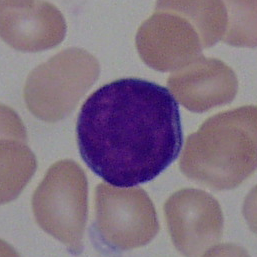

In [39]:
#examine a leukemia positive image at random from the training set

ALL_positive_list = []

for file in os.listdir("./input/training/positive"):
    file = "./input/training/positive/" + file
    ALL_positive_list.append(file)

#examine one of the images from leukemia negative individuals (the 6th image)
PIL.Image.open(ALL_positive_list[5], mode= 'r')

The images seem to appear normally.

### Summary for Initial Data Exploration

#### Quality issues
The dataset contains images of bone marrow aspirate smears from individuals, which depict their lumphocytes.

Originally, the dataset contained one file that was not an image file ('.DS_Store'). Since this program will be an image classification program, I will remove this unnecessary file from the final dataset. There were no missing values or wrong measurements and images in the training set showed properly. All the files are in the the JPEG format.

#### Feature Quality
Since my dataset is composed of images for classification, feature quality cannot be assessed by numerical measures. However, all images show bone marrow aspirate smears and are thus comparable and relevant to the program.

#### Value Distribution of Data
The training set contains 152 images from individuals who do not have acute lumphoblastic leukemia and 107 images from individuals who test positive for acute lymphoblastic leukemia. The validation set contains 27 images from leukemia-positive individuals and 38 images from leukemia-neagtive individuals. 

The graph visualizing this distribution of data in the training and validation sets is shown below:

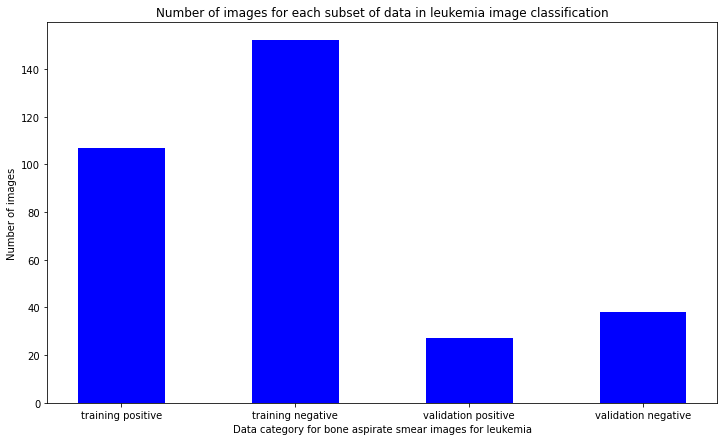

In [41]:
#visualization
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (12, 7))
#x values (the categories)
x = ['training positive', 'training negative', 'validation positive', 'validation negative']

#y values
y = [107, 152, 27, 38]

#create a bar plot comparing the number of images in each file
plt.bar(x, y, color = 'blue', width = 0.5)

#define the labels and the title
plt.xlabel("Data category for bone aspirate smear images for leukemia")
plt.ylabel("Number of images")
plt.title("Number of images for each subset of data in leukemia image classification")

plt.show()